### Steps 
1. Importing the datasets
2. Merging the dataset
3. Importing clustered Data
4. Label encoding
5. Fitting a Decision tree with depth 2
6. Increasing the depth and checking the scores
7. Plotting tree 
8. plotting variable importance
9. Importing the New customer data
10. Using the same tree to fit the new data
11. Checking the accuracy score
12. Getting rules from the Tree for each cluster

In [1]:

import numpy as np    
import pandas as pd 

In [2]:
import os
os.getcwd()

'E:\\MSc\\project'

In [3]:
#importing existing customer Data
CustDem = pd.read_csv("./Data/ExisitngCustomerDemographics.csv")

In [4]:
CustDem.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize
0,C12551,1999-12-19,M,Yes,2
1,C12552,1985-06-14,M,No,1
2,C12553,1985-11-21,M,Yes,4
3,C12554,1984-02-01,M,Yes,4
4,C12555,1998-04-05,F,Yes,2


In [5]:
CustTrans=pd.read_csv('./Data/ExistingCustomersTransactionsData.csv')

In [6]:
CustTrans.head()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity
0,B32607,2014-01-03,C14797,PR7138,Office Supplies,16.448,2
1,B37616,2014-01-03,C13917,PR7138,Office Supplies,16.448,2
2,B42625,2014-01-03,C14353,PR7138,Office Supplies,16.448,2
3,B32712,2014-01-04,C13351,PR7099,Office Supplies,11.784,3
4,B32712,2014-01-04,C13351,PR7490,Office Supplies,272.736,3


In [7]:
CustTrans.shape

(29982, 7)

In [8]:
CustDem.shape

(2379, 5)

In [9]:
MergeData= pd.merge(left=CustTrans, right=CustDem,how='left', left_on='CustomerID',right_on='CustomerID')

In [10]:
MergeData.head()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity,DOB,gender,MaritalStatus,Familysize
0,B32607,2014-01-03,C14797,PR7138,Office Supplies,16.448,2,1964-04-18,F,Yes,2
1,B37616,2014-01-03,C13917,PR7138,Office Supplies,16.448,2,1966-07-22,F,Yes,3
2,B42625,2014-01-03,C14353,PR7138,Office Supplies,16.448,2,1950-09-01,F,Yes,2
3,B32712,2014-01-04,C13351,PR7099,Office Supplies,11.784,3,1990-07-15,F,Yes,3
4,B32712,2014-01-04,C13351,PR7490,Office Supplies,272.736,3,1990-07-15,F,Yes,3


In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

## Clustered Data Decision Tree

In [13]:
#loading data from clustered dataset of existing customer data
clustered = pd.read_csv("./Clustered.csv")

In [14]:
clustered.head()

,Unnamed: 0,gender,MaritalStatus,Familysize,ProductCategory,Sales,Quantity,prodbin,Age,Billyear,Billmonth,pam_fit2$clustering
0,1,M,Yes,2,Furniture,60.288,8,"(6.4e+03,6.6e+03]",17,2016,7,1
1,2,M,Yes,2,Office Supplies,2.632,1,"(7e+03,7.2e+03]",17,2016,7,2
2,3,M,Yes,2,Technology,1035.800,4,"(7.6e+03,7.8e+03]",16,2015,10,3
3,4,M,Yes,2,Furniture,253.372,2,"(6e+03,6.2e+03]",17,2016,7,1
4,5,M,Yes,2,Technology,23.976,3,"(7.8e+03,8e+03]",18,2017,4,3


In [15]:
clustered["pam_fit2$clustering"].value_counts()

5    9497
2    8581
6    3398
4    3103
1    2965
3    2438
Name: pam_fit2$clustering, dtype: int64

In [16]:
clustered.dtypes

Unnamed: 0               int64
gender                  object
MaritalStatus           object
Familysize               int64
ProductCategory         object
Sales                  float64
Quantity                 int64
prodbin                 object
Age                      int64
Billyear                 int64
Billmonth                int64
pam_fit2$clustering      int64
dtype: object

In [17]:
clustered=clustered.drop(clustered.columns[0], axis=1)

In [18]:
clustered.dtypes

gender                  object
MaritalStatus           object
Familysize               int64
ProductCategory         object
Sales                  float64
Quantity                 int64
prodbin                 object
Age                      int64
Billyear                 int64
Billmonth                int64
pam_fit2$clustering      int64
dtype: object

In [19]:
clustered.columns= ['gender','MaritalStatus','Familysize','ProductCategory','Sales','Quantity','prodbin','Age','Billyear','Billmonth','cluster']

In [20]:
clustered.head()

,gender,MaritalStatus,Familysize,ProductCategory,Sales,Quantity,prodbin,Age,Billyear,Billmonth,cluster
0,M,Yes,2,Furniture,60.288,8,"(6.4e+03,6.6e+03]",17,2016,7,1
1,M,Yes,2,Office Supplies,2.632,1,"(7e+03,7.2e+03]",17,2016,7,2
2,M,Yes,2,Technology,1035.800,4,"(7.6e+03,7.8e+03]",16,2015,10,3
3,M,Yes,2,Furniture,253.372,2,"(6e+03,6.2e+03]",17,2016,7,1
4,M,Yes,2,Technology,23.976,3,"(7.8e+03,8e+03]",18,2017,4,3


In [21]:
print(clustered.dtypes)

gender              object
MaritalStatus       object
Familysize           int64
ProductCategory     object
Sales              float64
Quantity             int64
prodbin             object
Age                  int64
Billyear             int64
Billmonth            int64
cluster              int64
dtype: object


In [22]:
#product bin in integer format which we already did in previous dataset
Merged = pd.read_csv("./Merged.csv")
prodbin=Merged['prodbin']

In [23]:
#dropping prodbin from clustered dataset
clustered=clustered.drop('prodbin', axis=1)

In [24]:
#merging prodbin 
clustered= pd.concat([clustered.reset_index(drop=True), prodbin], axis=1)

In [25]:
#datatype conversion
for col in ['gender', 'MaritalStatus', 'ProductCategory', 'cluster','prodbin']:
    clustered[col] = clustered[col].astype('category')

In [26]:
lis = ['gender', 'MaritalStatus', 'ProductCategory','prodbin']

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
#label encoding all the categorical variables
for i in lis:
    le.fit(clustered[i])
    clustered[i] = le.fit_transform(clustered[i])

In [30]:
clustered.head()

,gender,MaritalStatus,Familysize,ProductCategory,Sales,Quantity,Age,Billyear,Billmonth,cluster,prodbin
0,1,1,2,0,60.288,8,17,2016,7,1,2
1,1,1,2,1,2.632,1,17,2016,7,2,5
2,1,1,2,2,1035.800,4,16,2015,10,3,8
3,1,1,2,0,253.372,2,17,2016,7,1,0
4,1,1,2,2,23.976,3,18,2017,4,3,9


In [31]:
clustered.dtypes

gender                int32
MaritalStatus         int32
Familysize            int64
ProductCategory       int32
Sales               float64
Quantity              int64
Age                   int64
Billyear              int64
Billmonth             int64
cluster            category
prodbin               int64
dtype: object

In [32]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix,mean_absolute_error,mean_squared_error

In [33]:
#importing graphviz for plotting decision tree
import graphviz

In [34]:
#splitting data
from sklearn.model_selection import train_test_split

In [35]:
trainx,testx,trainy,testy=train_test_split(clustered[['gender','MaritalStatus','Familysize','ProductCategory','Sales','Quantity','Age','Billyear','Billmonth','prodbin']],clustered[['cluster']],test_size=0.3,
                                           random_state=123)

In [36]:
X,y=clustered[['gender','MaritalStatus','Familysize','ProductCategory','Sales','Quantity','Age','Billyear','Billmonth','prodbin']],clustered[['cluster']]

In [37]:
trainx.head()

,gender,MaritalStatus,Familysize,ProductCategory,Sales,Quantity,Age,Billyear,Billmonth,prodbin
21116,0,1,2,2,527.920,2,18,2017,7,8
11613,1,1,3,1,44.400,3,44,2014,11,5
10584,1,1,4,1,7.506,9,39,2016,9,4
13330,0,1,3,2,72.744,7,22,2015,11,9
28162,1,1,2,1,5.229,3,46,2017,2,4


In [38]:
clf=DecisionTreeClassifier(max_depth=2)

In [39]:
DT=clf.fit(trainx,trainy)

In [40]:
pred_train=DT.predict(trainx)
pred_test=DT.predict(testx)

In [41]:
pred_train

array([5, 2, 2, ..., 1, 2, 2], dtype=int64)

In [42]:
#
print(list(zip(trainy['cluster'],pred_train)))

[(4, 5), (2, 2), (2, 2), (3, 5), (2, 2), (4, 5), (3, 5), (3, 2), (1, 1), (2, 2), (5, 5), (3, 2), (5, 5), (2, 2), (5, 5), (2, 2), (2, 2), (1, 1), (2, 2), (5, 5), (6, 6), (4, 2), (6, 6), (4, 2), (2, 2), (2, 2), (5, 5), (5, 5), (3, 5), (5, 5), (4, 5), (2, 2), (5, 5), (2, 2), (5, 5), (3, 2), (2, 2), (5, 5), (4, 5), (5, 5), (5, 5), (1, 1), (1, 1), (5, 5), (1, 1), (5, 5), (5, 5), (5, 5), (5, 5), (1, 1), (2, 2), (4, 5), (1, 1), (5, 5), (1, 1), (4, 5), (6, 6), (2, 2), (2, 2), (6, 6), (5, 5), (1, 1), (2, 2), (2, 2), (5, 5), (5, 5), (4, 2), (2, 2), (5, 5), (5, 5), (5, 5), (4, 2), (3, 2), (2, 2), (5, 5), (6, 6), (1, 1), (5, 5), (3, 2), (1, 1), (3, 2), (3, 2), (3, 2), (5, 5), (1, 1), (2, 2), (6, 6), (6, 6), (1, 1), (2, 2), (3, 2), (6, 6), (2, 2), (6, 6), (5, 5), (5, 5), (5, 5), (2, 2), (1, 1), (2, 2), (4, 5), (2, 2), (1, 1), (1, 1), (1, 1), (2, 2), (2, 2), (4, 5), (6, 6), (3, 5), (3, 2), (2, 2), (2, 2), (5, 5), (5, 5), (5, 5), (6, 6), (2, 2), (5, 5), (6, 6), (4, 5), (2, 2), (2, 2), (2, 2), (5, 5),

In [43]:
accuracy_score(y_pred=pred_train,y_true=trainy['cluster'])

0.8107399818935531

In [44]:
accuracy_score(y_pred=pred_test,y_true=testy['cluster'])

0.8255697609783212

In [45]:
confusion_matrix(y_pred=pred_test,y_true=testy['cluster'])

array([[ 927,    0,    0,    0,    0,    0],
       [   0, 2579,    0,    0,    0,    0],
       [   0,  515,    0,    0,  175,    0],
       [   0,  180,    0,    0,  699,    0],
       [   0,    0,    0,    0, 2893,    0],
       [   0,    0,    0,    0,    0, 1027]], dtype=int64)

In [46]:
#improving the depth of the tree to increase prediction accuracy
clf1=DecisionTreeClassifier(max_depth=4)

In [47]:
DT1=clf1.fit(trainx,trainy)
pred1_train=DT1.predict(trainx)
pred1_test=DT1.predict(testx)

In [48]:
accuracy_score(y_pred=pred1_train,y_true=trainy['cluster'])

0.9564492304760089

In [49]:
accuracy_score(y_pred=pred1_test,y_true=testy['cluster'])

0.960644802668149

In [50]:
confusion_matrix(y_pred=pred1_test,y_true=testy['cluster'])

array([[ 927,    0,    0,    0,    0,    0],
       [   0, 2579,    0,    0,    0,    0],
       [   0,    0,  336,  354,    0,    0],
       [   0,    0,    0,  879,    0,    0],
       [   0,    0,    0,    0, 2893,    0],
       [   0,    0,    0,    0,    0, 1027]], dtype=int64)

In [55]:
#setting system path for graphviz variables
import os
os.environ["PATH"] += os.pathsep + 'c:/Program Files (x86)/Graphviz2.38/bin/'

In [51]:
def plot_tree(tree,dataframe,label_col,plot_title):
    label_names=pd.unique(dataframe[label_col])
    # Obtaining plot data.
    label_names=str(label_names)
    graph_data=export_graphviz(tree,feature_names=dataframe.drop(label_col,axis=1).columns,
                               class_names=label_names,filled=True,rounded=True,out_file=None)

    # Generating plot.
    graph=graphviz.Source(graph_data)
    graph.render(plot_title)
    graph.render(filename ="Decision3.png") 
    return graph

In [52]:
pd.unique(clustered["cluster"]).astype("category")

[1, 2, 3, 4, 5, 6]
Categories (6, int64): [1, 2, 3, 4, 5, 6]

In [53]:
clustered['cluster'].dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=False)

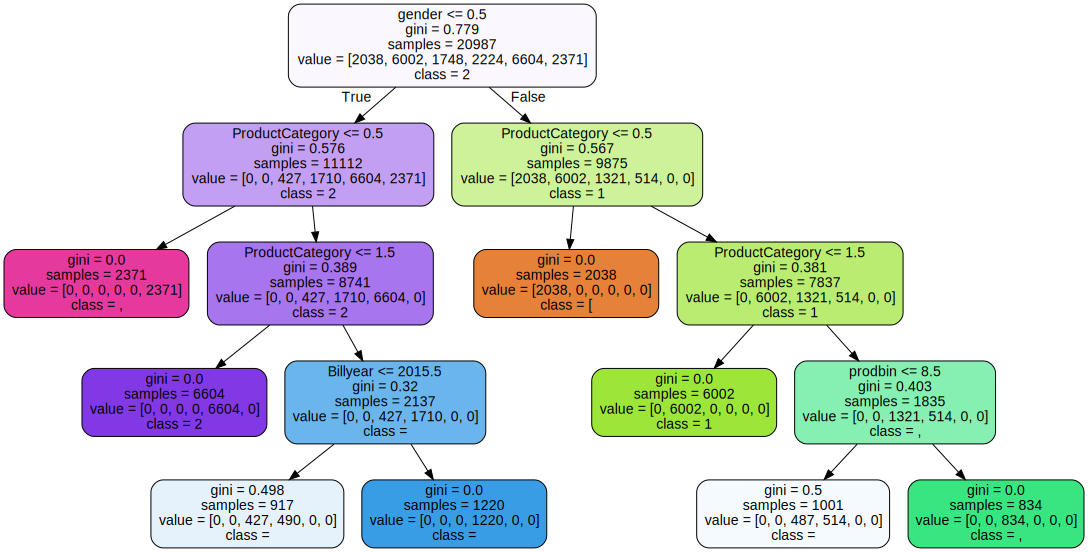

In [56]:
tree_graph=plot_tree(DT1,clustered,'cluster',"plot")
tree_graph

In [114]:
#checking with depth 3
clf2=DecisionTreeClassifier(max_depth=3)

In [115]:
DT2=clf2.fit(trainx,trainy)
pred_train=DT2.predict(trainx)
pred_test=DT2.predict(testx)

In [116]:
accuracy_score(y_pred=pred_train,y_true=trainy['cluster'])

0.9551627197789108

In [117]:
accuracy_score(y_pred=pred_test,y_true=testy['cluster'])

0.9605336297943302

In [118]:
confusion_matrix(y_pred=pred_train,y_true=trainy['cluster'])

array([[2038,    0,    0,    0,    0,    0],
       [   0, 6002,    0,    0,    0,    0],
       [   0,    0, 1321,  427,    0,    0],
       [   0,    0,  514, 1710,    0,    0],
       [   0,    0,    0,    0, 6604,    0],
       [   0,    0,    0,    0,    0, 2371]], dtype=int64)

In [119]:
confusion_matrix(y_pred=pred_test,y_true=testy['cluster'])

array([[ 927,    0,    0,    0,    0,    0],
       [   0, 2579,    0,    0,    0,    0],
       [   0,    0,  515,  175,    0,    0],
       [   0,    0,  180,  699,    0,    0],
       [   0,    0,    0,    0, 2893,    0],
       [   0,    0,    0,    0,    0, 1027]], dtype=int64)

In [57]:
importances = clf1.feature_importances_

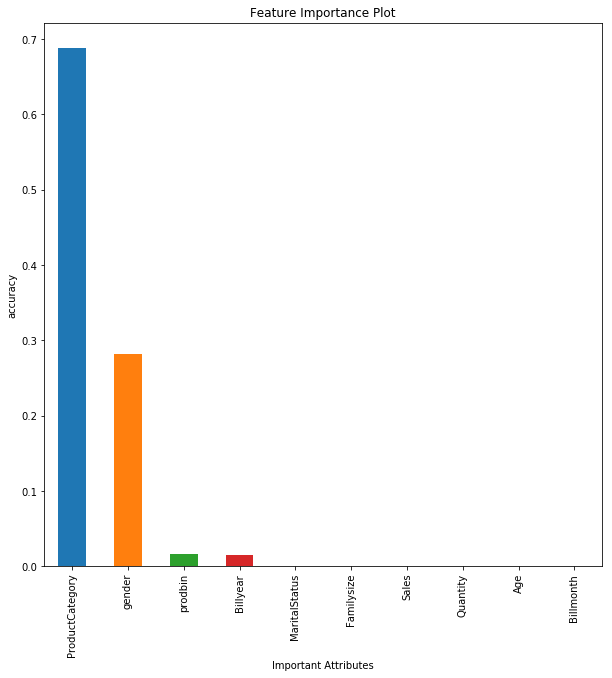

In [58]:
feat_importances = pd.Series(importances, index=trainx.columns)

%matplotlib inline
import matplotlib.pyplot as plt

fig5,ax=plt.subplots(figsize=(10,10))
plt.title('Feature Importance Plot')
plt.xlabel('Important Attributes')
plt.ylabel('accuracy')
feat_importances.nlargest(20).plot(kind='bar')
fig5.savefig("featureimportance.png")

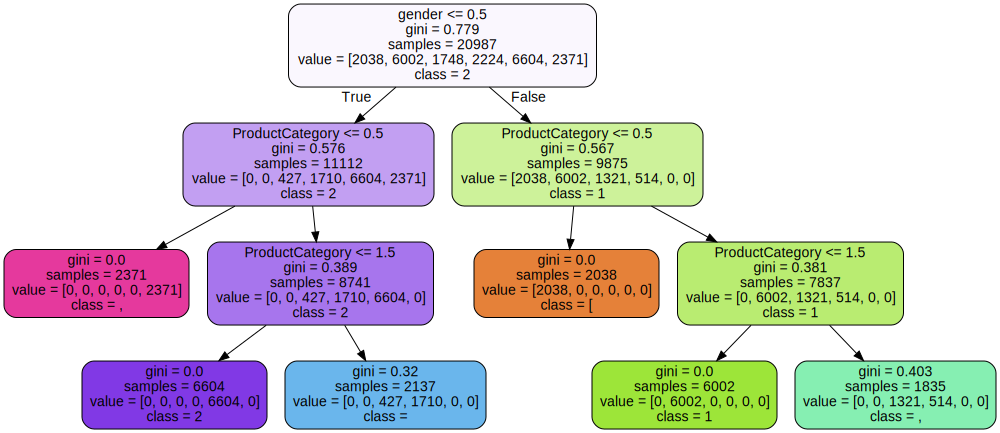

In [120]:
tree_graph=plot_tree(DT2,clustered,'cluster',"plot")
tree_graph

In [59]:
# loading new customer dataset
NewDem = pd.read_csv("./Data/NewCustomerDemographics_Segmentation.csv")

In [60]:
NewTrans=pd.read_csv("./Data/NewCustomerTransactions_Segmentation.csv")

In [61]:
NewDem.head()

,CustomerID,DOB,gender,MaritalStatus,Familysize
0,C21116,1973-11-21,M,Yes,4
1,C21117,1985-03-12,M,Yes,3
2,C21118,1978-12-27,M,Yes,4
3,C21119,1998-09-21,M,Yes,3
4,C21120,1943-03-08,M,Yes,4


In [62]:
NewTrans.head()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity
0,B38262,2014-09-19,C21116,PR7012,Office Supplies,5.670,3
1,B38128,2014-09-23,C21116,PR7313,Office Supplies,28.800,9
2,B42017,2015-03-16,C21116,PR6640,Office Supplies,17.520,3
3,B39125,2015-04-29,C21116,PR7219,Office Supplies,7.968,2
4,B38809,2015-12-11,C21116,PR6925,Office Supplies,110.528,4


In [63]:
NewMergeData= pd.merge(left=NewTrans, right=NewDem,how='left', left_on='CustomerID',right_on='CustomerID')

In [64]:
NewMergeData.head()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity,DOB,gender,MaritalStatus,Familysize
0,B38262,2014-09-19,C21116,PR7012,Office Supplies,5.670,3,1973-11-21,M,Yes,4
1,B38128,2014-09-23,C21116,PR7313,Office Supplies,28.800,9,1973-11-21,M,Yes,4
2,B42017,2015-03-16,C21116,PR6640,Office Supplies,17.520,3,1973-11-21,M,Yes,4
3,B39125,2015-04-29,C21116,PR7219,Office Supplies,7.968,2,1973-11-21,M,Yes,4
4,B38809,2015-12-11,C21116,PR6925,Office Supplies,110.528,4,1973-11-21,M,Yes,4


In [65]:
NewMergeData['CustomerID']=NewMergeData['CustomerID'].str.replace('[a-zA-Z]', '')


In [67]:
NewMergeData['CustomerID'];

In [68]:
NewMergeData['ProductID']=NewMergeData['ProductID'].str.replace('[a-zA-Z]', '')


In [69]:
NewMergeData['ProductID'].str.replace('[a-zA-Z]', '').sort_values();

In [70]:
NewMergeData['ProductID']=NewMergeData['ProductID'].astype('int64')

In [71]:
#Binning product category in prodbins
bins=[6000,6200,6400,6600,6800,7000,7200,7400,7600,7800,8000]
labels = [1,2,3,4,5,6,7,8,9,10]

NewMergeData['Prodbin'] = pd.cut(NewMergeData['ProductID'], bins=bins, labels=labels)


In [72]:
NewMergeData['Prodbin'].value_counts()

5     817
8     765
2     733
4     671
3     649
6     636
7     594
9     534
10    509
1     312
Name: Prodbin, dtype: int64

In [74]:
NewMergeData['BillNumber'].str.replace('[a-zA-Z]', '').sort_values();

In [75]:
NewMergeData.head()

,BillNumber,BillDate,CustomerID,ProductID,ProductCategory,Sales,Quantity,DOB,gender,MaritalStatus,Familysize,Prodbin
0,B38262,2014-09-19,21116,7012,Office Supplies,5.670,3,1973-11-21,M,Yes,4,6
1,B38128,2014-09-23,21116,7313,Office Supplies,28.800,9,1973-11-21,M,Yes,4,7
2,B42017,2015-03-16,21116,6640,Office Supplies,17.520,3,1973-11-21,M,Yes,4,4
3,B39125,2015-04-29,21116,7219,Office Supplies,7.968,2,1973-11-21,M,Yes,4,7
4,B38809,2015-12-11,21116,6925,Office Supplies,110.528,4,1973-11-21,M,Yes,4,5


In [76]:
#dropping ID variables
NewMergeData=NewMergeData.drop("ProductID",axis=1)
NewMergeData=NewMergeData.drop("CustomerID",axis=1)
NewMergeData=NewMergeData.drop("BillNumber",axis=1)

In [77]:
NewMergeData['BillDate']=pd.to_datetime(NewMergeData['BillDate'],format='%Y-%m-%d', errors='ignore')
NewMergeData['DOB']=pd.to_datetime(NewMergeData['DOB'],format='%Y-%m-%d', errors='ignore')

In [ ]:
#extracting new features from data

In [78]:
NewMergeData['Age']=(NewMergeData['BillDate']-NewMergeData['DOB'])/np.timedelta64(1,'Y')

In [79]:
NewMergeData['year']=NewMergeData['BillDate'].dt.year

In [80]:
NewMergeData['month']=NewMergeData['BillDate'].dt.month

In [81]:
NewMergeData=NewMergeData.drop("BillDate",axis=1)
NewMergeData=NewMergeData.drop("DOB",axis=1)

In [82]:
NewMergeData['Age']=NewMergeData['Age'].astype(int)

In [83]:
NewMergeData.head()

,ProductCategory,Sales,Quantity,gender,MaritalStatus,Familysize,Prodbin,Age,year,month
0,Office Supplies,5.670,3,M,Yes,4,6,40,2014,9
1,Office Supplies,28.800,9,M,Yes,4,7,40,2014,9
2,Office Supplies,17.520,3,M,Yes,4,4,41,2015,3
3,Office Supplies,7.968,2,M,Yes,4,7,41,2015,4
4,Office Supplies,110.528,4,M,Yes,4,5,42,2015,12


In [84]:
#datatype conversion
for col in ['gender', 'MaritalStatus', 'ProductCategory','Prodbin']:
    NewMergeData[col] = NewMergeData[col].astype('category')

In [85]:
NewMergeData.dtypes

ProductCategory    category
Sales               float64
Quantity              int64
gender             category
MaritalStatus      category
Familysize            int64
Prodbin            category
Age                   int32
year                  int64
month                 int64
dtype: object

In [86]:
#saving the cleaned dataset
NewMergeData.to_csv('NewMergeData.csv',index=False)

In [87]:
le = preprocessing.LabelEncoder()

In [88]:
lis =['gender', 'MaritalStatus', 'ProductCategory','Prodbin']

In [89]:
#label encoding the newdataset
for i in lis:
    le.fit(NewMergeData[i])
    NewMergeData[i] = le.fit_transform(NewMergeData[i])

In [90]:
NewMergeData.head()

,ProductCategory,Sales,Quantity,gender,MaritalStatus,Familysize,Prodbin,Age,year,month
0,1,5.670,3,1,1,4,5,40,2014,9
1,1,28.800,9,1,1,4,6,40,2014,9
2,1,17.520,3,1,1,4,3,41,2015,3
3,1,7.968,2,1,1,4,6,41,2015,4
4,1,110.528,4,1,1,4,4,42,2015,12


In [91]:
prodbin=NewMergeData['Prodbin']

In [92]:
X=NewMergeData

In [93]:

pred3=DT1.predict(X)

In [94]:
NewMergeData['pred']=pred3

In [95]:
NewMergeData.head()

,ProductCategory,Sales,Quantity,gender,MaritalStatus,Familysize,Prodbin,Age,year,month,pred
0,1,5.670,3,1,1,4,5,40,2014,9,2
1,1,28.800,9,1,1,4,6,40,2014,9,2
2,1,17.520,3,1,1,4,3,41,2015,3,2
3,1,7.968,2,1,1,4,6,41,2015,4,2
4,1,110.528,4,1,1,4,4,42,2015,12,2


In [96]:
NewUnsupPred = pd.read_csv("./NewunsupPred.csv")

In [97]:
accuracy_score(y_pred=NewMergeData['pred'],y_true=NewUnsupPred['pred'])

0.4009646302250804

In [98]:
confusion_matrix(y_pred=NewMergeData['pred'],y_true=NewUnsupPred['pred'])

array([[   0,    0,    0,    0,  591,    0],
       [   0, 1751,    0,    0,    0,    0],
       [   0,  514,    0,    0,    0,    0],
       [ 620,    0,    0,    0,    0,    0],
       [2001,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,  743]], dtype=int64)

In [99]:
NewMergeData['pred'].value_counts()

1    2621
2    2265
6     743
5     591
Name: pred, dtype: int64

In [100]:
NewUnsupPred['pred'].value_counts()

5    2001
2    1751
6     743
4     620
1     591
3     514
Name: pred, dtype: int64

# Segement Behaviour

Cluster 7
gender F, Product category-0, familysize>1,

Cluster-6
gender-F, product category-2,familysie=1

Cluster-5
gender-F, product category-1,

Cluster-4
gender-M,single,product category-0

Cluster-3
gender-M, product category-2

Cluster-2
gender-M,product category-1,


Cluster-1
gender-M,Married,product category-0
